## Project: Get Insights on Twitter Data "WeRateDogs"

### Introduction

In this notebook I'm going to analyze the dataset `Twitter Data WeRateDogs`. This dataset consists of about 2000 tweets posted on Twitter between end of 2015 and mid of 2017. This Twitter channel provides dog pictures with funny comments and ratings. Besides the original tweet data from Twitter this dataset also includes image prediction data of a machine learning algorithm.
Based on this date we are focusing on answering the following questions:

Which dog breeds (recognized by the machine learning algorithm) are rated highest by WeRateDogs?
Which dog breeds have highest favorite counts or retweet rates?
Is there a correlation between rating and favorite count?

### Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
%matplotlib inline

In [2]:
#read in previously cleaned tweet data
df = pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,full_text,truncated,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None,This is Phineas. He's a mystical boy. Only eve...,False,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,This is Tilly. She's just checking pup on you....,False,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [3]:
#get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1959 non-null   int64  
 1   timestamp                      1959 non-null   object 
 2   source                         1959 non-null   object 
 3   text                           1959 non-null   object 
 4   expanded_urls                  1959 non-null   object 
 5   rating_numerator               1959 non-null   float64
 6   name                           1959 non-null   object 
 7   dog_stage                      1959 non-null   object 
 8   full_text                      1959 non-null   object 
 9   truncated                      1959 non-null   bool   
 10  display_text_range             1959 non-null   object 
 11  entities                       1959 non-null   object 
 12  extended_entities              1959 non-null   o

### Clean data

The present data was already cleaned in a separate step and is a result of a provided Twitter archive, additionally gathered data via the Twitter API and a separately provided dataset of image prediction data.
Though not all aspects of the present dataset are perfectly clean, we decide to get our insights without further cleaning.

### Exploratory Data Analysis

Let's have a look on our relevant variable. What information do we get when looking on a scatter matrix?

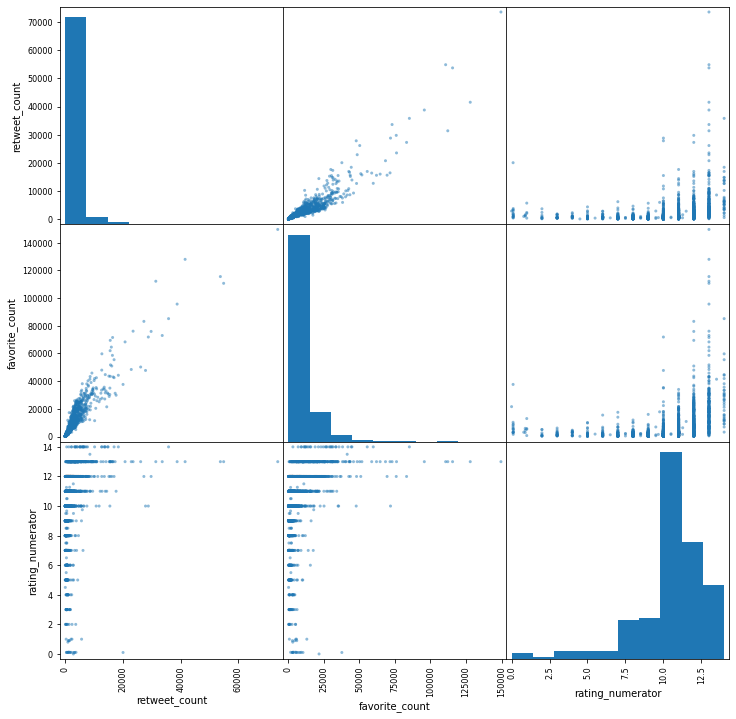

In [38]:
pd.plotting.scatter_matrix(df[['retweet_count', 'favorite_count', 'rating_numerator']], figsize=(12,12));

Visualized like this we see obvious correlations between __all of__ the three variables.

### Question: Which dog breeds get highest ratings?

Using value_counts we are going to have a look on the recognized dog breeds. But first let's have one more look at the recognition probabilities calculated by the machine learning algorithm.

In [43]:
#we only look for tweets where first indication says that a dog was recognized
contains_dog = df.p1_dog == True
#print proportion of tweets where p1 was dog breed
df[contains_dog].shape[0]/df.shape[0]

0.742215416028586

According to the algorithm only about 75% of the tweets are clearly showing a dog. At least on first prediction.
Let's have a look on the other ones.

In [49]:
#set pandas to display all content
pd.set_option('display.max_colwidth', None)
df[~contains_dog].tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,full_text,truncated,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,intercept
1937,666293911632134144,2015-11-16 16:37:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3.0,a,None,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,False,...,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False,1
1940,666268910803644416,2015-11-16 14:57:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,https://twitter.com/dog_rates/status/666268910803644416/photo/1,10.0,None,None,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,False,...,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,1
1941,666104133288665088,2015-11-16 04:02:55+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1.0,None,None,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,False,...,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False,1
1950,666057090499244032,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9.0,a,None,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,False,...,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,1
1952,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.0,an,None,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,False,...,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,1


According to the description and rating and after sample checks I assume that there are also dogs on the images that are just not recognized by the algorithm. So let's at least add the lower rate predictions if they predict a dog.

In [59]:
#get most probable dog breed in new column
def getMost_Probable_Dog_Breed(tweet):
    if tweet.p1_dog:
        return(tweet.p1)
    elif tweet.p2_dog:
        return(tweet.p2)
    elif tweet.p3_dog:
        return(tweet.p3)
    else:
        return(None)
        

df['most_probable_breed'] = df.apply(lambda x: getMost_Probable_Dog_Breed(x), axis=1)
consider_all_predictions = ~df.most_probable_breed.isnull()
df[consider_all_predictions].shape[0]/df.shape[0]

0.8458397141398672

In [77]:
#How many breeds are there in our newly created columns
df.most_probable_breed.nunique()

113

This enhances our recognized dog rate to around 85%.
As there are many different dog breeds we reduce our analysis to the top 10

In [57]:
#find top 10 recognized dog breeds only looking at p1
top10dogs = df[df.p1_dog].p1.value_counts().nlargest(10)
top10dogs

golden_retriever      136
Labrador_retriever     92
Pembroke               88
Chihuahua              78
pug                    53
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             36
malamute               29
Name: p1, dtype: int64

In [62]:
#find top 10 recognized dog breeds looking at p1-p3
top10dogs_all = df[consider_all_predictions].most_probable_breed.value_counts().nlargest(10)
top10dogs_all

golden_retriever      155
Labrador_retriever    104
Pembroke               94
Chihuahua              90
pug                    61
toy_poodle             49
chow                   48
Pomeranian             41
Samoyed                41
malamute               33
Name: most_probable_breed, dtype: int64

This didn't affect results significantly. Let's go on working with the top10dogs_all list.

In [63]:
#find the top 10 recognized dog breeds mean rating
ratings_top10_dogs = df[df.p1.isin(top10dogs_all.keys())].groupby(['p1']).mean()['rating_numerator'].reindex(top10dogs_all.keys())

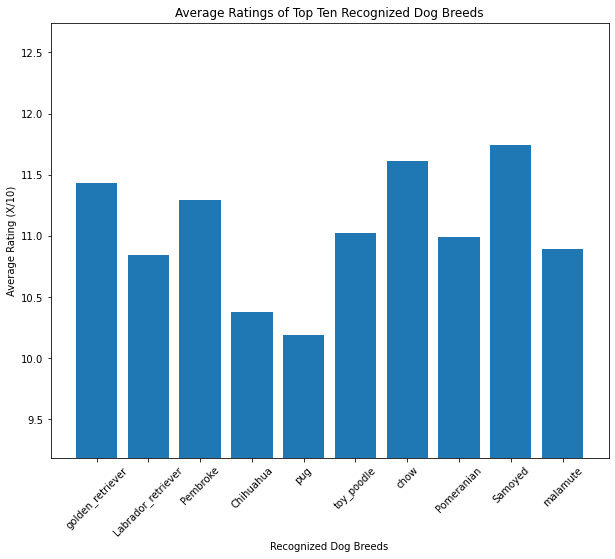

In [64]:
# Create a bar chart with proper label

def draw_Dog_Bar_Plot(data, title, xlabel, ylabel, ylim_offset):
    locations = np.arange(10)
    heights = data.values
    labels = data.keys()
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(10)
    ax.set(ylim=(data.min()-ylim_offset, data.max()+ylim_offset))
    ax.set_xticks(locations)
    ax.set_xticklabels(labels, rotation=45, rotation_mode="default")
    ax.bar(locations, heights)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);

draw_Dog_Bar_Plot(ratings_top10_dogs,
                  'Average Ratings of Top Ten Recognized Dog Breeds',
                  'Recognized Dog Breeds',
                  'Average Rating (X/10)',
                  1)

### Question: Which dog breeds do get highest favorite or retweet counts?

Based on the data we can now also have a look on favorite or retweet counts.

In [65]:
#find favorite count of top 10 recognized dog breeds
favoritecounts_top10_dogs = df[df.p1.isin(top10dogs_all.keys())].groupby(['p1']).mean()['favorite_count'].reindex(top10dogs_all.keys())
favoritecounts_top10_dogs

golden_retriever      11133.977941
Labrador_retriever    10294.500000
Pembroke              10165.181818
Chihuahua              7892.333333
pug                    5246.735849
toy_poodle             5757.944444
chow                   8897.097561
Pomeranian             7184.210526
Samoyed               11836.923077
malamute               7717.724138
Name: favorite_count, dtype: float64

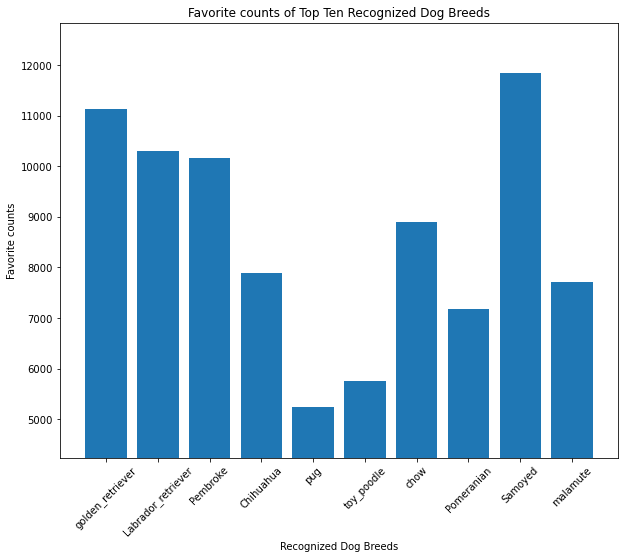

In [66]:
draw_Dog_Bar_Plot(favoritecounts_top10_dogs,
                  'Favorite counts of Top Ten Recognized Dog Breeds',
                  'Recognized Dog Breeds',
                  'Favorite counts',
                  1000)

In [67]:
retweetcounts_top10_dogs = df[df.p1.isin(top10dogs_all.keys())].groupby(['p1']).mean()['favorite_count'].reindex(top10dogs_all.keys())
retweetcounts_top10_dogs

golden_retriever      11133.977941
Labrador_retriever    10294.500000
Pembroke              10165.181818
Chihuahua              7892.333333
pug                    5246.735849
toy_poodle             5757.944444
chow                   8897.097561
Pomeranian             7184.210526
Samoyed               11836.923077
malamute               7717.724138
Name: favorite_count, dtype: float64

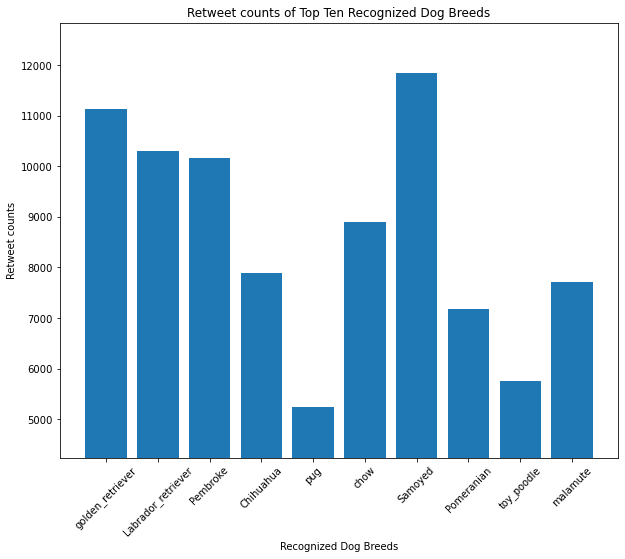

In [15]:
draw_Dog_Bar_Plot(retweetcounts_top10_dogs,
                  'Retweet counts of Top Ten Recognized Dog Breeds',
                  'Recognized Dog Breeds',
                  'Retweet counts',
                  1000)

### Question: Is there a correlation between favorite counts and rating?

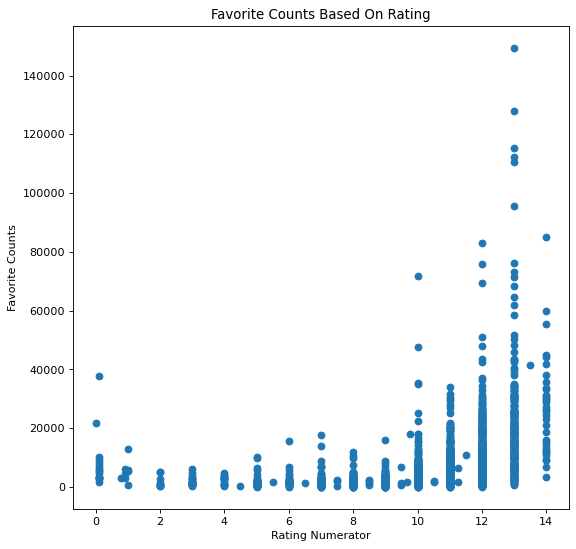

In [76]:
plt.figure(figsize=(8, 8), dpi=80)
plt.title('Favorite Counts Based On Rating')
plt.xlabel('Rating Numerator')
plt.ylabel('Favorite Counts')
plt.scatter(df['rating_numerator'], df['favorite_count']);

As the digram indicates a correlation I'm going to look at its significance using a linear regression model.

In [70]:
df['intercept'] = 1

lm = sms.OLS(df['favorite_count'], df[['intercept', 'rating_numerator']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     300.9
Date:                Tue, 11 May 2021   Prob (F-statistic):           8.13e-63
Time:                        23:30:35   Log-Likelihood:                -21004.
No. Observations:                1959   AIC:                         4.201e+04
Df Residuals:                    1957   BIC:                         4.202e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept        -1.079e+04   1111.350     -9.709      0.000    -1.3e+04   -8610.633
rating_numerator  1800.8064    103.811     17.347      0.000    1597.215    2004.397
==============================================================================
Omnibus:                     1920.549   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112162.904
Skew:                           4.631   Prob(JB):                         0.00
Kurtosis:                      38.893   Cond. No.                         48.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value (0.0) indicates that this correlation is statistically significant

## Conclusion

We were looking at recognized dog breeds and saw which breeds get higher ratings, favorite and retweet counts.
Additionally we looked on the correlation between rating and favorite counts. 
Based on the data there is a significant correlation between the two.

Limitations:
* As there are many different dog breeds, value counts for each breed are relatively small (33-155 individual tweets per dog breed) - all observations are therefore limited
* A central assumption concerning the dog breed was that the image recognition algorithm is reliable. I didn't double check on this, so this may also have significant impact on the result.